In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Задание функции 7 вариант
def F1(x):
    return 1/x
def F2(x):
    return np.log(x)
def F(x):
    return F1(x)-F2(x)

In [3]:
def steffensen(f, x0, epsilon=1e-6, max_iter=100):
    x = x0
    iterations = 0
    
    for _ in range(max_iter):
        fx = f(x)
        if abs(fx) < epsilon:
            break

        delta = f(x + fx) - fx
        if abs(delta) < epsilon:
            raise ZeroDivisionError("Деление на ноль в методе Стеффенсена.")
        
        # Обновление x по формуле Стеффенсена
        x_new = x - (fx ** 2) / delta
        
        # Проверка сходимости по изменению x
        if abs(x_new - x) < epsilon:
            break
            
        x = x_new
        iterations += 1
    
    return x, iterations

In [4]:
# Задание точек
a = 1
x_points = np.linspace(0.1, 2, 7)
x_eval = np.linspace(0.1, 2, 100)
y_points = F(x_points)

Интерполяция

In [5]:
def newton_interpolation(x_points, y_points, x_eval):
    n = len(x_points)
    G = np.zeros((n, n))
    G[:, 0] = y_points.copy()
    
    # Заполнение таблицы разделенных разностей
    for j in range(1, n):               # Столбцы (разности)
        for i in range(n - j):          # Строки
            G[i, j] = (G[i+1, j-1] - G[i, j-1]) / (x_points[i+j] - x_points[i])
    
    # Вычисление полинома Ньютона
    y_interp = np.zeros_like(x_eval)
    for k in range(len(x_eval)):
        x = x_eval[k]
        term = G[0, 0]                  # Начало с F[0,0]
        product = 1.0
        for i in range(1, n):           # Учитываем все степени
            product *= (x - x_points[i-1])
            term += product * G[0, i]   # Используем первую строку таблицы
        y_interp[k] = term
    return y_interp

In [6]:
y_newton = newton_interpolation(x_points, y_points, x_eval)

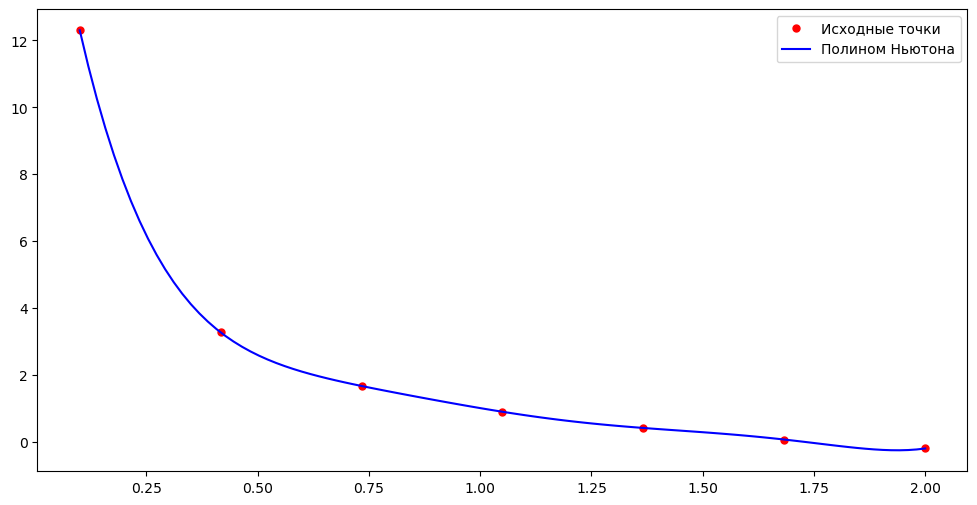

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(x_points, y_points, 'ro', markersize=5, label='Исходные точки')
plt.plot(x_eval, y_newton, 'b-', label='Полином Ньютона')
plt.legend()

In [8]:
def cubic_spline_interpolation(x, y, x_eval):
    n = len(x) - 1
    h = np.diff(x)
    delta = np.diff(y) / h
    
    # Построение трехдиагональной матрицы
    main_diag = np.zeros(n+1)
    main_diag[0] = 1.0
    main_diag[-1] = 1.0
    for i in range(1, n):
        main_diag[i] = 2.0 * (h[i-1] + h[i])
    
    lower_diag = np.zeros(n)
    upper_diag = np.zeros(n)
    lower_diag[:-1] = h[:-1]
    upper_diag[1:] = h[1:]
    
    A = np.diag(main_diag) + np.diag(lower_diag, -1) + np.diag(upper_diag, 1)
    b = np.zeros(n+1)
    for i in range(1, n):
        b[i] = 3.0 * (delta[i] - delta[i-1])
    
    c = np.linalg.solve(A, b)
    a = y[:-1]
    b_coeff = delta - h * (2.0 * c[:-1] + c[1:]) / 3.0
    d = (c[1:] - c[:-1]) / (3.0 * h)
    
    spline_values = np.zeros_like(x_eval)
    for i in range(len(x_eval)):
        xi = x_eval[i]
        idx = np.searchsorted(x, xi) - 1
        if idx < 0:
            idx = 0
        elif idx >= n:
            idx = n-1
        t = xi - x[idx]
        spline_values[i] = d[idx] * t**3 + c[idx] * t**2 + b_coeff[idx] * t + a[idx]
    return spline_values

In [9]:
y_spline = cubic_spline_interpolation(x_points, y_points, x_eval)

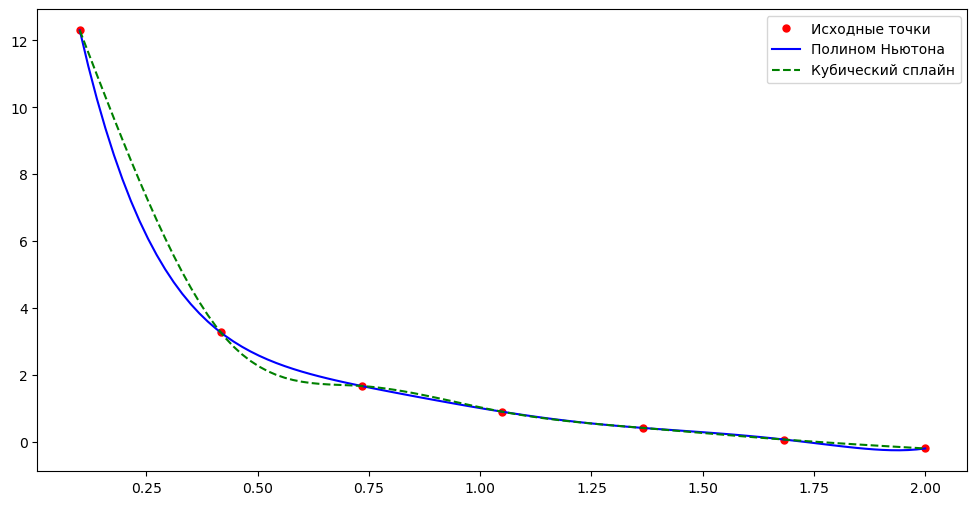

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(x_points, y_points, 'ro', markersize=5, label='Исходные точки')
plt.plot(x_eval, y_newton, 'b-', label='Полином Ньютона')
plt.plot(x_eval, y_spline, 'g--', label='Кубический сплайн')
plt.legend()

In [11]:
def piecewise_linear_interpolation(x_points, y_points, x_eval):
    y_interp = np.zeros_like(x_eval)
    # Находим индексы интервалов для каждой точки x_eval
    indices = np.searchsorted(x_points, x_eval) - 1
    # Ограничиваем индексы в пределах [0, n-2]
    indices = np.clip(indices, 0, len(x_points) - 2)
    
    for i in range(len(x_eval)):
        idx = indices[i]
        x0, x1 = x_points[idx], x_points[idx + 1]
        y0, y1 = y_points[idx], y_points[idx + 1]
        # Коэффициент наклона
        slope = (y1 - y0) / (x1 - x0)
        # Линейная интерполяция
        y_interp[i] = y0 + slope * (x_eval[i] - x0)
    
    return y_interp

In [12]:
y_eval = piecewise_linear_interpolation(x_points, y_points, x_eval)

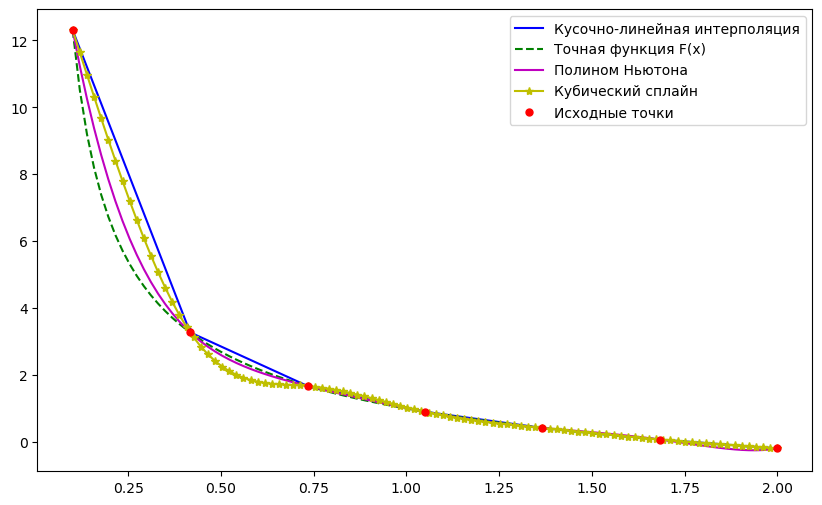

In [13]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x_eval, y_eval, 'b-', label='Кусочно-линейная интерполяция')
plt.plot(x_eval, F(x_eval), 'g--', label='Точная функция F(x)')
plt.plot(x_eval, y_newton, 'm-', label='Полином Ньютона')
plt.plot(x_eval, y_spline, 'y-*', label='Кубический сплайн')
plt.plot(x_points, y_points, 'ro', markersize=5, label='Исходные точки')
plt.legend()

<!-- Апроксимация -->

Дополнительная Аппроксимация Кривой Безье

In [14]:
# Кривая Безье
def bezier_curve(x_points, y_points, t):
    n = len(x_points) - 1
    x_bezier = np.zeros_like(t)
    y_bezier = np.zeros_like(t)
    for i in range(len(t)):
        ti = t[i]
        x = 0.0
        y = 0.0
        for k in range(n+1):
            binom = np.math.comb(n, k)
            B = binom * ti**k * (1 - ti)**(n - k)
            x += x_points[k] * B
            y += y_points[k] * B
        x_bezier[i] = x
        y_bezier[i] = y
    return x_bezier, y_bezier

In [15]:
t = np.linspace(0, 1, 100)
x_bezier, y_bezier = bezier_curve(x_points, y_points, t)

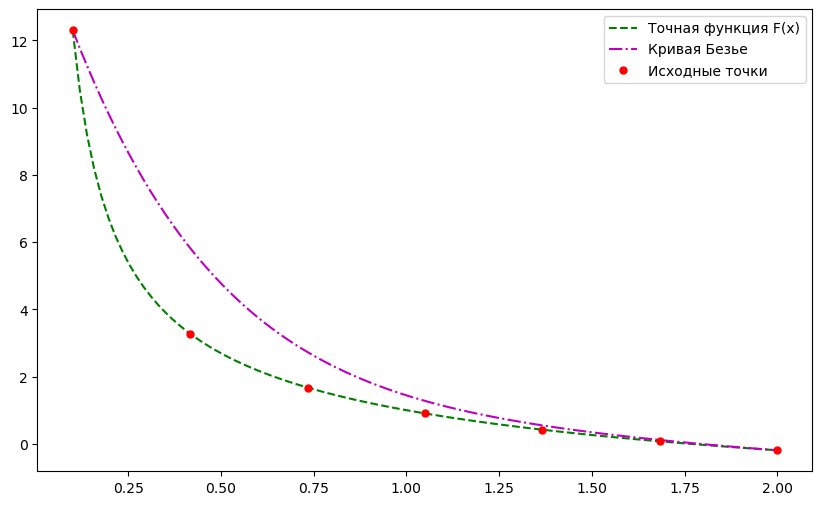

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(x_eval, F(x_eval), 'g--', label='Точная функция F(x)')
plt.plot(x_bezier, y_bezier, 'm-.', label='Кривая Безье')
plt.plot(x_points, y_points, 'ro', markersize=5, label='Исходные точки')
plt.legend()

Аппроксимация корня x*(a)

In [17]:
def F(x,a):
    return a/x + np.log(x)

In [18]:
def newton_method(f, a, x0, h=1e-5, epsilon=1e-7, max_it=100):
    x = x0
    it = 0
    
    while it < max_it:
        fx = f(x, a)
        dfx = (f(x + h, a) - f(x - h, a)) / (2 * h)  
        
        if abs(fx) < epsilon:
            break
        if abs(dfx) < 1e-10:
            raise ValueError("Производная слишком мала.")
        
        x_new = x - fx / dfx
        
        # Проверка области определения
        if x_new <= 0:
            raise ValueError("x_new <= 0")
        
        if abs(x_new - x) < epsilon:
            break
        
        x = x_new
        it += 1
    
    return x, it

In [22]:
x0 = 0.5
a_crit = np.exp(-1)
a_values = np.linspace(1e-9, a_crit - 1e-8, 100)
x_roots = []

# Вычисление корней с обработкой исключений
for a in a_values:
    try:
        x, _ = newton_method(F, a, x0)
        x_roots.append(x)
    except:
        x_roots.append(np.nan)  # Неудачные случаи отмечаем как NaN

# Фильтрация некорректных значений
valid = ~np.isnan(x_roots)
a_filtered = a_values[valid]
x_filtered = np.array(x_roots)[valid]

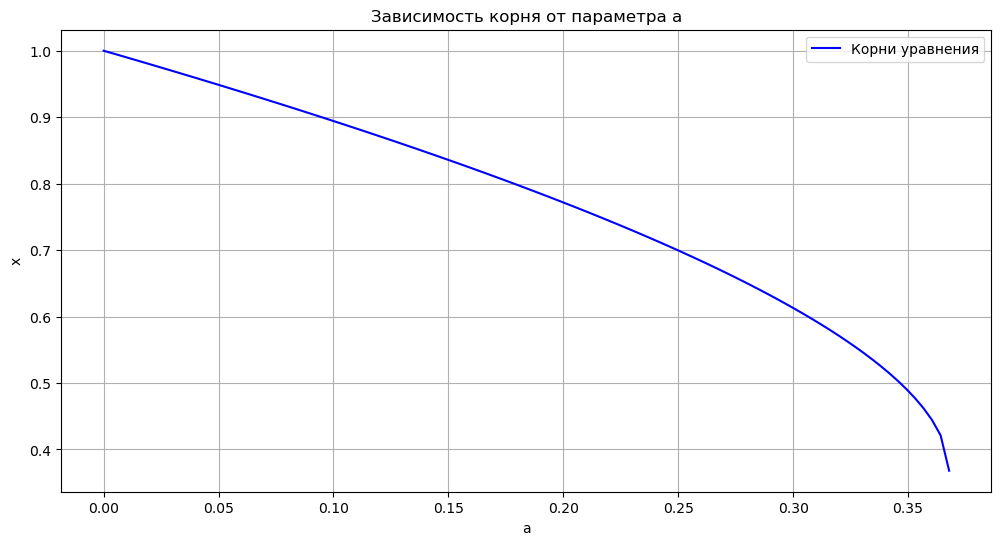

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(a_filtered, x_filtered, 'b-', label='Корни уравнения')
plt.xlabel('a')
plt.ylabel('x')
plt.title('Зависимость корня от параметра a')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Линейная регрессия
sum_a = np.sum(a_filtered)
sum_x = np.sum(x_filtered)
sum_a2 = np.sum(a_filtered**2)
sum_ax = np.sum(a_filtered * x_filtered)
n = len(a_filtered)
A = np.array([[sum_a2, sum_a], [sum_a, n]])
B = np.array([sum_ax, sum_x])
k, b = np.linalg.solve(A, B)
x_lin_reg = k * a_filtered + b

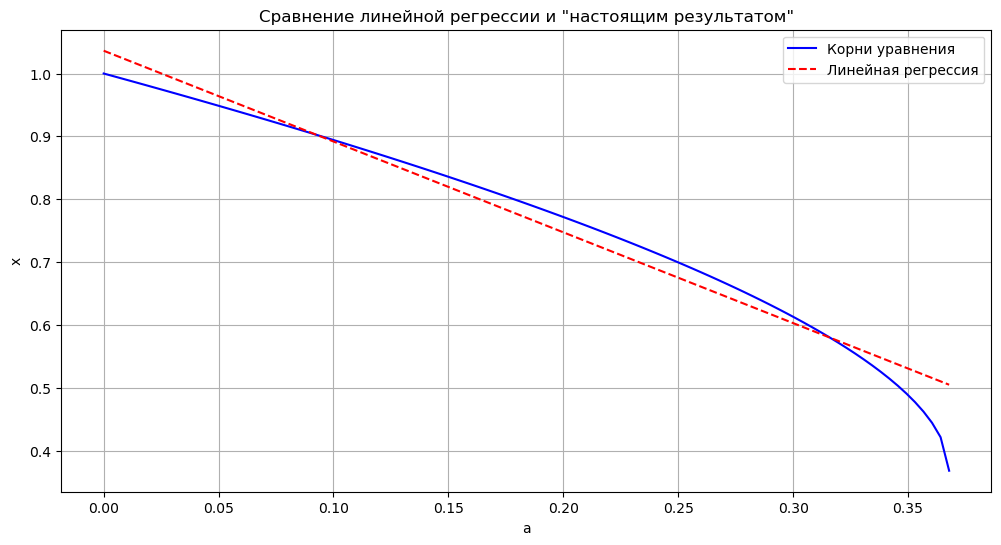

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(a_filtered, x_filtered, 'b-', label='Корни уравнения')
plt.plot(a_filtered, x_lin_reg, 'r--', label='Линейная регрессия')
plt.xlabel('a')
plt.ylabel('x')
plt.title('Сравнение линейной регрессии и "настоящим результатом"')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# Квадратичная аппроксимация
sum_a3 = np.sum(a_filtered**3)
sum_a4 = np.sum(a_filtered**4)
sum_a2x = np.sum(a_filtered**2 *  x_filtered)
A = np.array([[sum_a4, sum_a3, sum_a2], [sum_a3, sum_a2, sum_a], [sum_a2, sum_a, n]])
B = np.array([sum_a2x, sum_ax, sum_x])
p1, p2, p3 = np.linalg.solve(A, B)
x_quad_fit = p1 * a_filtered**2 + p2 * a_filtered + p3

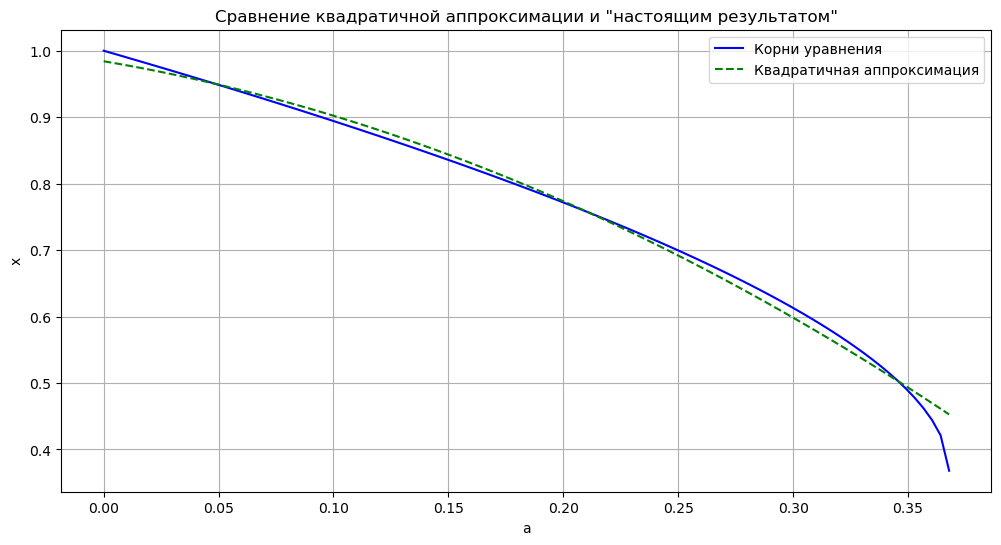

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(a_filtered, x_filtered, 'b-', label='Корни уравнения')
plt.plot(a_filtered,  x_quad_fit, 'g--', label='Квадратичная аппроксимация')
plt.xlabel('a')
plt.ylabel('x')
plt.title('Сравнение квадратичной аппроксимации и "настоящим результатом"')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Рациональная аппроксимация
def rational_func(a, p1, p2, p3, q1):
    return (p1 * a**2 + p2 * a + p3) / (1 + q1 * a)

X = np.vstack([a_filtered**2, a_filtered, np.ones_like(a_filtered), -x_filtered * a_filtered]).T
coeffs = np.linalg.lstsq(X, x_filtered, rcond=None)[0]
p1, p2, p3, q1 = coeffs
x_rat_fit = rational_func(a_filtered, p1, p2, p3, q1)

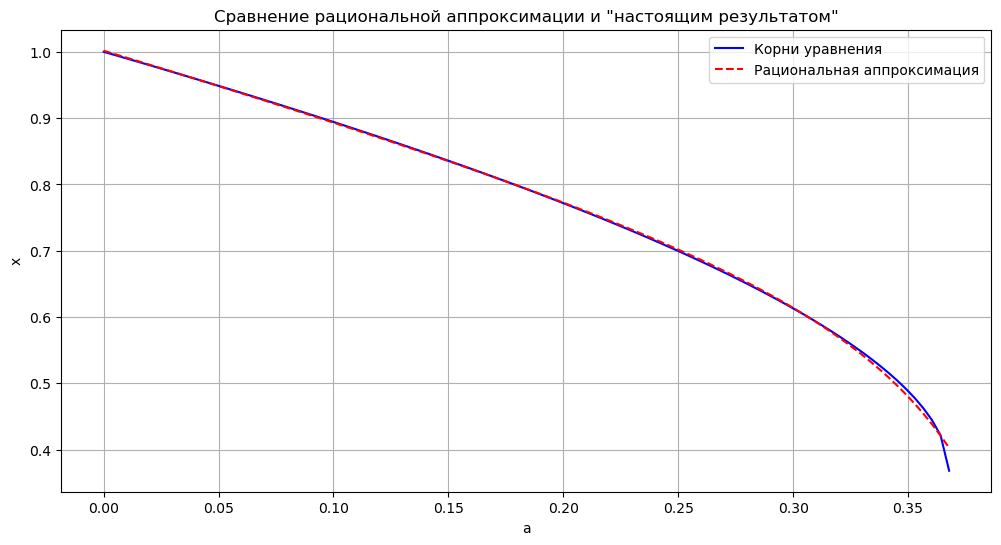

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(a_filtered, x_filtered, 'b-', label='Корни уравнения')
plt.plot(a_filtered, x_rat_fit, 'r--', label='Рациональная аппроксимация')
plt.xlabel('a')
plt.ylabel('x')
plt.title('Сравнение рациональной аппроксимации и "настоящим результатом"')
plt.legend()
plt.grid(True)
plt.show()